### Checking Linear Regression Assumptions

#### Classical Assumptions of Ordinary Least Squares

1. Regression is linear in parameters & correctly specified
2. The error terms are normally distributed and zero population mean
3. The error term has constant variance $Var({\epsilon_i})={\sigma^2}$ for every i (no heteroskedasticity)
4. Errors are uncorrelated across observations: $cov({\epsilon_i},{\epsilon_j})=0$ for two observations i and j (no serial correlation)
5. No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import scipy.stats as stats
%matplotlib inline

#### Assumption #1 : Regression is linear in parameters & correctly specified

Examples :    
 (Good):  $ Y= {\beta_0}+ {\beta_1}X_1+{\beta_2}X_2 +{\epsilon}$   
 (Bad): $ Y= {\beta_0}+ e^{\beta_1}X^{\beta_2}$

In [3]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x.reshape(s,1),y)
    pred = rgr.predict(x.reshape(s,1))

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    

In [4]:
# Generate some data
s = 30
x = np.random.uniform(low=-5, high=5, size=s)

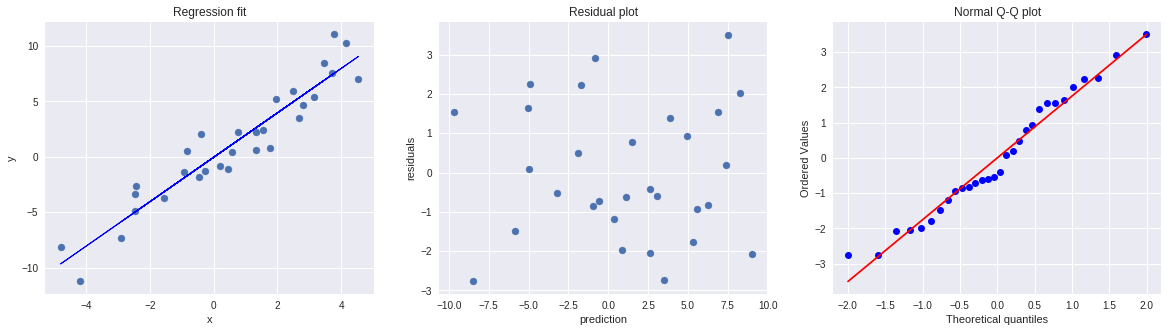

In [5]:
ep = 2*np.random.randn(s)
beta = 2
y = beta*x + ep

diagnostic_plot(x, y)

Diagnose: (1) Inspect plot of observed data vs predicted values (points should be symmetrically about the line)    OR (2) Inspect your residuals (points should by  symmetric about (y=0) and roughly constant variance)

Look carefully for evidence of a "bowed" pattern, indicating that the model makes systematic errors whenever it is making unusually large or small predictions.  (as shown below) 

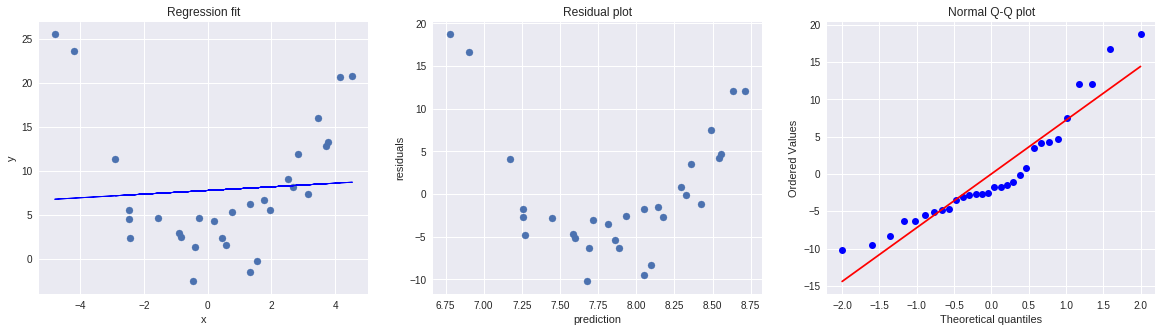

In [6]:
ep = 3*np.random.randn(s)
beta1 = 1
y = beta1*(x**2) + ep

diagnostic_plot(x, y)

In [7]:
# we have to add bike data here. . 
# Let's explore our assumptios - Let's look at some bike data
data = pd.read_csv('../../week02-luther1/03-regression_statsmodels/data/hour.csv')

In [8]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# removing non-numeric data
cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
X = data[cols]
y = data.cnt

In [10]:
# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y)

#### Assumption #2 : 

Residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean: 

We can check this assumption as follows by plotting our residuals vs $\hat{Y}$:

 

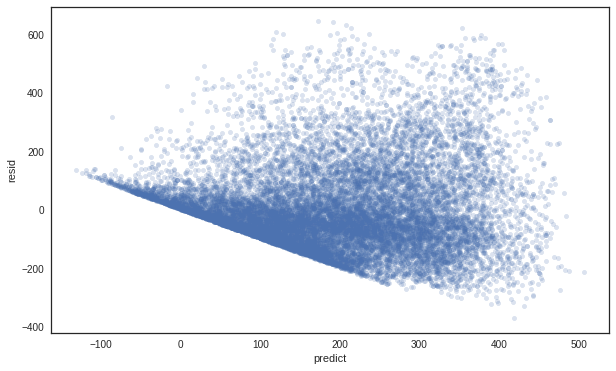

In [11]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

data['predict']=fit.predict(X)
data['resid']=data.cnt-data.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))


In [12]:
# Q: What is going on with the lower bound of the plot? 

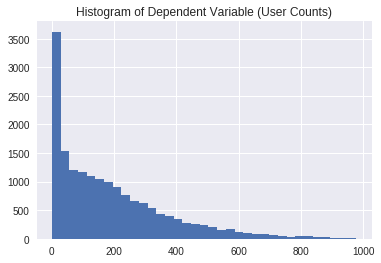

In [13]:
# (Inspect histogram)
data.cnt.hist(bins=35)
plt.title('Histogram of Dependent Variable (User Counts)')

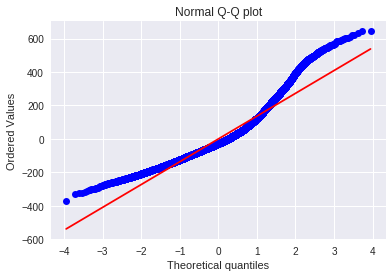

In [14]:
# We can diagnose/ inspect our normality assumption using qqplot:
stats.probplot(data['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [15]:
# A : This is count data!   the assumption that errors are normally distributed 
# cant be held (more about count data when we discuss the poisson distribution in a 
# couple of weeks).  Remember that our dependent variable should not be categorical or 
# rank (i.e. rank of films ) either.

In [16]:
# Let's bring in movie data
movie=pd.read_csv('../../../challenges/challenges_data/2013_movies.csv')

# let's just drop nan's for now..
movie=movie.dropna()
movie.describe()

,Budget,DomesticTotalGross,Runtime
count,8.700000e+01,8.700000e+01,87.000000
mean,7.545402e+07,1.035153e+08,112.551724
std,5.969168e+07,8.797319e+07,17.854554
min,2.500000e+06,2.556825e+07,80.000000
25%,2.900000e+07,4.793810e+07,98.000000
50%,5.500000e+07,7.162818e+07,113.000000
75%,1.125000e+08,1.238093e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


Other reasons for not having a normal distribution of errors: 
Skewed data (due to outliers) : A few extreme observations can skew our data (Confidence intervals are based on the assumption of normal distribution)  You want to inspect your outliers and/or transform your 
y variable (if y is positive, you can use log transformation) 


In [17]:
# looking at numeric data
X = movie[['Budget','Runtime']]
y = movie.DomesticTotalGross

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           3.70e-23
Time:                        14:39:36   Log-Likelihood:                -1699.6
No. Observations:                  87   AIC:                             3403.
Df Residuals:                      85   BIC:                             3408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         0.7377      0.143      5.164      0.000       0.454       1.022
Runtime     4.246e+05    1.2e+05      3.528      0.001    1.85e+05    6.64e+05
==============================================================================
Omnibus:                       38.987   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.387
Skew:                           1.592   Prob(JB):                     1.94e-21
Kurtosis:                       7.022   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

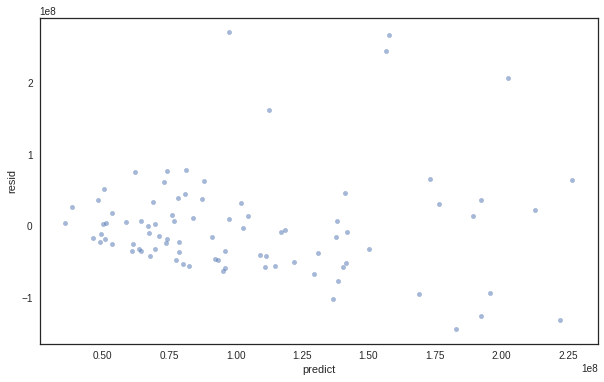

In [18]:
# Residual plot: plot residuals vs predicted
movie['predict']=fit.predict(X)
movie['resid']= y-movie.predict
with sns.axes_style('white'):
    plot = movie.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))



Q: What is wrong with the above plot? Which assumption is this plot inconsistent with? 
   What can we do about it?  
A: This plot is inconsistent with **Assumption #3**: (The error term must have constant variance). Here we see signs of heteroskedasticity.
However, the rule of thumb is: OLS regression isn't too impacted by heteroscedasticity as long as the maximum variance is not greater than 4 times the minimum variance (as in this case).  If the residual variance of your model exceeds this range, we can opt for a Weighted Lease Squares model: http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/wls.html

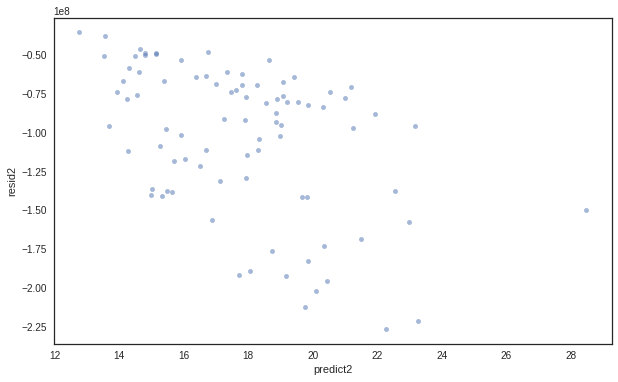

In [19]:
# Testing 

X = movie[['Budget', 'Runtime']]
y_log = np.log(movie.DomesticTotalGross)

model = sm.OLS(y_log,X)
fit = model.fit()
fit.summary()


movie['predict2'] = fit.predict(X)
movie['resid2'] = y_log-movie.predict
with sns.axes_style('white'):
    plot = movie.plot(
        kind='scatter', x='predict2', y='resid2', alpha=0.5, figsize=(10,6))

Fix: Depends: this could be due to a time series  (ex: we could expect this to happen if we didnt account for inflation for Budget/DG data).

Otherwise, if y is positive we can perform a y log transformation. 

### Assumption 4: Errors are uncorrelated across observations

To check this assumption, let's plot residuals vs. time: 

In [20]:
# Take the date and time fields into a single datetime column
movie["DATE_TIME"] = pd.to_datetime(movie.ReleaseDate , format="%Y-%m-%d")
movie.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,predict,resid,predict2,resid2,DATE_TIME
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1.578873e+08,2.667808e+08,22.986921,-1.578873e+08,2013-11-22


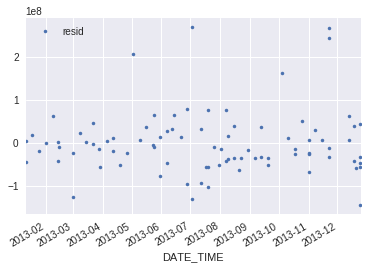

In [21]:
ts = movie[['DATE_TIME','resid']].set_index('DATE_TIME')
ts.plot(style=".")

Fix: If we did see a strong relationship between errors and time,this would indicate that our model is incorrectly specified.  We'd want to treat our model as a time series (more on this tomorrow!)
    

### Assumption #5

No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

As discussed: 
1. Inspect correlations of independent features
2. Keep an eye on condition number ! 